# Improved Human Activity Recognition through Ensemble Learning

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import time
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import *
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
d=pd.read_csv("sample_submission.csv")
d.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [2]:
d.shape 

(153164, 7)

In [3]:
d.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.0,153164.0,153164.0,153164.0,153164.0,153164.0
mean,0.5,0.5,0.5,0.5,0.5,0.5
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.5,0.5,0.5,0.5,0.5,0.5
25%,0.5,0.5,0.5,0.5,0.5,0.5
50%,0.5,0.5,0.5,0.5,0.5,0.5
75%,0.5,0.5,0.5,0.5,0.5,0.5
max,0.5,0.5,0.5,0.5,0.5,0.5


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             153164 non-null  object 
 1   toxic          153164 non-null  float64
 2   severe_toxic   153164 non-null  float64
 3   obscene        153164 non-null  float64
 4   threat         153164 non-null  float64
 5   insult         153164 non-null  float64
 6   identity_hate  153164 non-null  float64
dtypes: float64(6), object(1)
memory usage: 8.2+ MB


In [5]:
d.columns

Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [6]:
d.toxic.value_counts()

0.5    153164
Name: toxic, dtype: int64

In [7]:
# d['activity_code']= d.Activity.astype('category').cat.codes

In [8]:
# d.activity_code

In [9]:
d1=d.drop('id',axis=1)
d1

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.5,0.5,0.5,0.5,0.5,0.5
1,0.5,0.5,0.5,0.5,0.5,0.5
2,0.5,0.5,0.5,0.5,0.5,0.5
3,0.5,0.5,0.5,0.5,0.5,0.5
4,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...
153159,0.5,0.5,0.5,0.5,0.5,0.5
153160,0.5,0.5,0.5,0.5,0.5,0.5
153161,0.5,0.5,0.5,0.5,0.5,0.5
153162,0.5,0.5,0.5,0.5,0.5,0.5


In [10]:
xcol=d1.columns.to_list()
xcol.pop(-1)
xdata=d1[xcol]
ycol='toxic'

In [11]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test =train_test_split(d1[xcol],d1[ycol].values,test_size =0.1)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((137847, 5), (15317, 5), (137847,), (15317,))

In [13]:
y_test 

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [14]:
model_score_1 = pd.DataFrame(columns = ("index","Model",'Training Accuracy',"Testing Accuracy"))

### Training and testing accuracies of models

In [15]:
x_train,y_train

(        toxic  severe_toxic  obscene  threat  insult
 1813      0.5           0.5      0.5     0.5     0.5
 74113     0.5           0.5      0.5     0.5     0.5
 50176     0.5           0.5      0.5     0.5     0.5
 92586     0.5           0.5      0.5     0.5     0.5
 3749      0.5           0.5      0.5     0.5     0.5
 ...       ...           ...      ...     ...     ...
 83464     0.5           0.5      0.5     0.5     0.5
 128176    0.5           0.5      0.5     0.5     0.5
 64876     0.5           0.5      0.5     0.5     0.5
 24661     0.5           0.5      0.5     0.5     0.5
 77819     0.5           0.5      0.5     0.5     0.5
 
 [137847 rows x 5 columns],
 array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]))

In [16]:
x_train

,toxic,severe_toxic,obscene,threat,insult
1813,0.5,0.5,0.5,0.5,0.5
74113,0.5,0.5,0.5,0.5,0.5
50176,0.5,0.5,0.5,0.5,0.5
92586,0.5,0.5,0.5,0.5,0.5
3749,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...
83464,0.5,0.5,0.5,0.5,0.5
128176,0.5,0.5,0.5,0.5,0.5
64876,0.5,0.5,0.5,0.5,0.5
24661,0.5,0.5,0.5,0.5,0.5


In [17]:
y_train

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [97]:
#Random Forest
#Build Random Forest model using ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_train_pred_rf=rf.predict(x_train)#predicting train data
y_test_pred_rf=rf.predict(x_test)

ValueError: Unknown label type: 'continuous'

#### print("Training Accuracy ",accuracy_score(y_train, y_train_pred_rf))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred_rf))

In [76]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[1],'Model':['Random Forest'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_rf)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_rf)]}))
model_score_1

NameError: name 'y_train_pred_rf' is not defined

In [93]:
#Decision Tree
tdt = DecisionTreeClassifier().fit(x_train,y_train)
y_train_pred_tdt=tdt.predict(x_train)#predicting train data
y_test_pred_tdt=tdt.predict(x_test)

ValueError: Unknown label type: 'continuous'

In [22]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred_tdt))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred_tdt))

Training Accuracy  1.0
Testing Accuracy  0.9510869565217391


In [23]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[2],'Model':['Decision Tree'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_tdt)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_tdt)]}))
model_score_1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\68489289.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[2],'Model':['Decision Tree'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_tdt)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_tdt)]}))


,index,Model,Training Accuracy,Testing Accuracy
0,1,Random Forest,1.0,0.976902
0,2,Decision Tree,1.0,0.951087


In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

for i in np.arange(0.1, 1.1 , 0.1):
    for y in ["l1", 'l2']:
        logisticRegr = LogisticRegression(random_state = 5, max_iter=1000, C=i, penalty = y, solver = 'liblinear')
logisticRegr.fit(x_train, y_train)
y_train_pred_lr=logisticRegr.predict(x_train)
y_test_pred_lr = logisticRegr.predict(x_test)

In [25]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred_lr))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred_lr))

Training Accuracy  0.9918379685610641
Testing Accuracy  0.9836956521739131


In [26]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[3],'Model':['Logistic Regression'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_lr)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_lr)]}))
model_score_1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\3490898824.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[3],'Model':['Logistic Regression'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_lr)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_lr)]}))


,index,Model,Training Accuracy,Testing Accuracy
0,1,Random Forest,1.000000,0.976902
0,2,Decision Tree,1.000000,0.951087
0,3,Logistic Regression,0.991838,0.983696


In [27]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
y_train_pred_knn=knn.predict(x_train)#predicting train data
y_test_pred_knn=knn.predict(x_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [28]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred_knn))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred_knn))

Training Accuracy  0.977932285368803
Testing Accuracy  0.96875


In [29]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[4],'Model':['KNN'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_knn)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_knn)]}))
model_score_1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\1519477524.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[4],'Model':['KNN'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_knn)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_knn)]}))


,index,Model,Training Accuracy,Testing Accuracy
0,1,Random Forest,1.000000,0.976902
0,2,Decision Tree,1.000000,0.951087
0,3,Logistic Regression,0.991838,0.983696
0,4,KNN,0.977932,0.968750


In [30]:
#Support Vector Classification
sv=SVC(kernel='linear',probability = True) #default kernel is 'rbl'
sv.fit(x_train,y_train)
y_train_pred_svc=sv.predict(x_train)#predicting train data
y_test_pred_svc=sv.predict(x_test)

In [31]:
print("Training Accuracy ",accuracy_score(y_train, y_train_pred_svc))#Accuracy of train data is 100%
print("Testing Accuracy ",accuracy_score(y_test, y_test_pred_svc))

Training Accuracy  0.9935006045949214
Testing Accuracy  0.9904891304347826


In [32]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[5],'Model':['SVM'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_svc)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_svc)]}))
model_score_1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\1623132905.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[5],'Model':['SVM'],'Training Accuracy':[accuracy_score(y_train, y_train_pred_svc)],'Testing Accuracy':[accuracy_score(y_test, y_test_pred_svc)]}))


,index,Model,Training Accuracy,Testing Accuracy
0,1,Random Forest,1.000000,0.976902
0,2,Decision Tree,1.000000,0.951087
0,3,Logistic Regression,0.991838,0.983696
0,4,KNN,0.977932,0.968750
0,5,SVM,0.993501,0.990489


### F1_Scores/ F1_measures of models

In [33]:
classifiers = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),  
    LogisticRegression(max_iter=10000),    
    KNeighborsClassifier(),
    SVC(kernel="rbf")  
]

In [34]:
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Score: {round(f,3)} \t Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")

In [35]:
f_score(x_train, x_test, y_train, y_test)

Score: 0.977 	 Time(in secs): 27.783 	 Classifier: RandomForestClassifier
Score: 0.948 	 Time(in secs): 10.798 	 Classifier: DecisionTreeClassifier
Score: 0.985 	 Time(in secs): 44.335 	 Classifier: LogisticRegression


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Score: 0.98 	 Time(in secs): 0.521 	 Classifier: KNeighborsClassifier
Score: 0.943 	 Time(in secs): 10.049 	 Classifier: SVC


### Precision/Recall Of models

In [36]:
#Random Forest
pred_rf = rf.predict(x_test)

In [37]:
model_score_2 = pd.DataFrame(columns = ("index","Model",'Recall','Precision'))

In [38]:
precision = precision_score(y_test, pred_rf, average='micro')
recall = recall_score(y_test, pred_rf,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9769021739130435
Recall:  0.9769021739130435


In [39]:
model_score_2 = model_score_2.append(pd.DataFrame({'index':[1],'Model':['Random Forest'],'Recall':[recall],'Precision':[precision]}))
model_score_2

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\2857457298.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[1],'Model':['Random Forest'],'Recall':[recall],'Precision':[precision]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902


In [40]:
#Decision Tree
pred_tdt = tdt.predict(x_test)

In [41]:
precision = precision_score(y_test, pred_tdt, average='micro')
recall = recall_score(y_test, pred_tdt,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9510869565217391
Recall:  0.9510869565217391


In [42]:
model_score_2 = model_score_2.append(pd.DataFrame({'index':[2],'Model':['Decision tree'],'Recall':[recall],'Precision':[precision]}))
model_score_2

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\3244416305.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[2],'Model':['Decision tree'],'Recall':[recall],'Precision':[precision]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087


In [43]:
#Logistic Regression
pred_lr = logisticRegr.predict(x_test)

In [44]:
precision = precision_score(y_test, pred_lr, average='micro')
recall = recall_score(y_test, pred_lr,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9836956521739131
Recall:  0.9836956521739131


In [45]:
model_score_2 = model_score_2.append(pd.DataFrame({'index':[3],'Model':['Logistic Regression'],'Recall':[recall],'Precision':[precision]}))
model_score_2;

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\2951303786.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[3],'Model':['Logistic Regression'],'Recall':[recall],'Precision':[precision]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696


In [46]:
#KNN
pred_knn = knn.predict(x_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
precision = precision_score(y_test, pred_knn, average='micro')
recall = recall_score(y_test, pred_knn,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.96875
Recall:  0.96875


In [48]:
model_score_2 = model_score_2.append(pd.DataFrame({'index':[4],'Model':['KNN'],'Recall':[recall],'Precision':[precision]}))
model_score_2

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\3761949840.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[4],'Model':['KNN'],'Recall':[recall],'Precision':[precision]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696
0,4,KNN,0.968750,0.968750


In [49]:
#SVC
pred_svc = sv.predict(x_test)

In [50]:
precision = precision_score(y_test, pred_svc, average='micro')
recall = recall_score(y_test, pred_svc,average='micro')
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.9904891304347826
Recall:  0.9904891304347826


In [51]:
model_score_2 = model_score_2.append(pd.DataFrame({'index':[5],'Model':['SVM'],'Recall':[recall],'Precision':[precision]}))
model_score_2

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\3773394986.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[5],'Model':['SVM'],'Recall':[recall],'Precision':[precision]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696
0,4,KNN,0.968750,0.968750
0,5,SVM,0.990489,0.990489


### Confusion Matrix And ROC of models

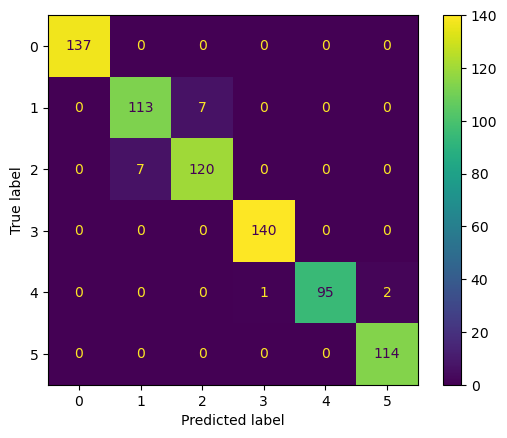

In [52]:
##Random Forest
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_rf=confusion_matrix(y_test,y_test_pred_rf,labels=[0,1,2,3,4,5])
confusion_matrix_rf
cm_display_rf =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)

cm_display_rf.plot()
plt.show()

In [53]:
!pip install scikit-plot

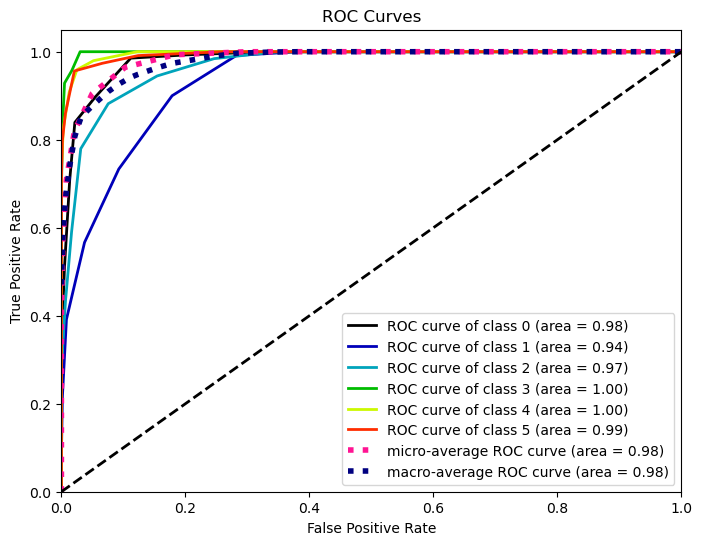

In [54]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
classifier = RandomForestClassifier(n_estimators=10,max_features=1,random_state=42)
classifier.fit(x_train, y_train);
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

In [55]:
##Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_features=6,random_state=42)
classifier.fit(x_train, y_train);

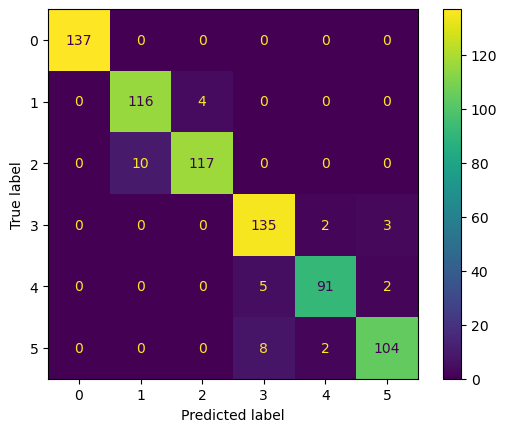

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_tdt=confusion_matrix(y_test,y_test_pred_tdt,labels=[0,1,2,3,4,5])
confusion_matrix_tdt
cm_display_tdt =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_tdt)

cm_display_tdt.plot()
plt.show()

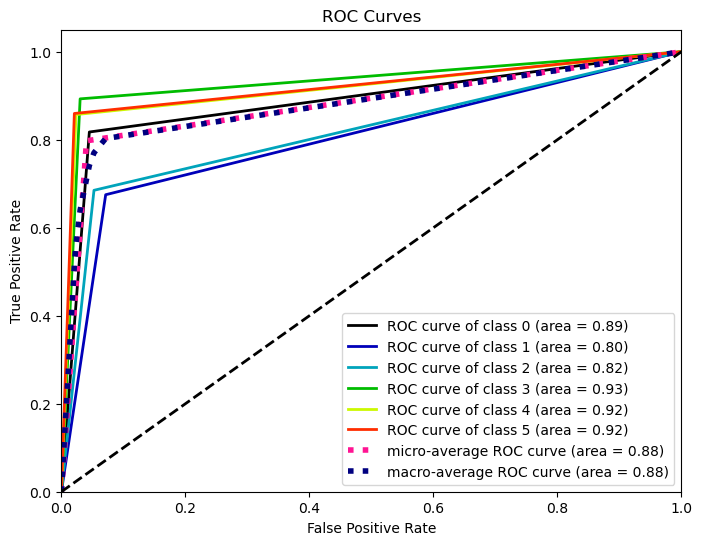

In [57]:
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

In [58]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(x_train, y_train);

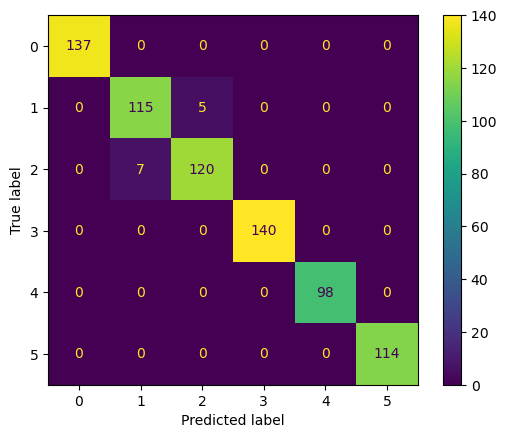

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_lr=confusion_matrix(y_test,y_test_pred_lr,labels=[0,1,2,3,4,5])
confusion_matrix_lr
cm_display_lr =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr)

cm_display_lr.plot()
plt.show()

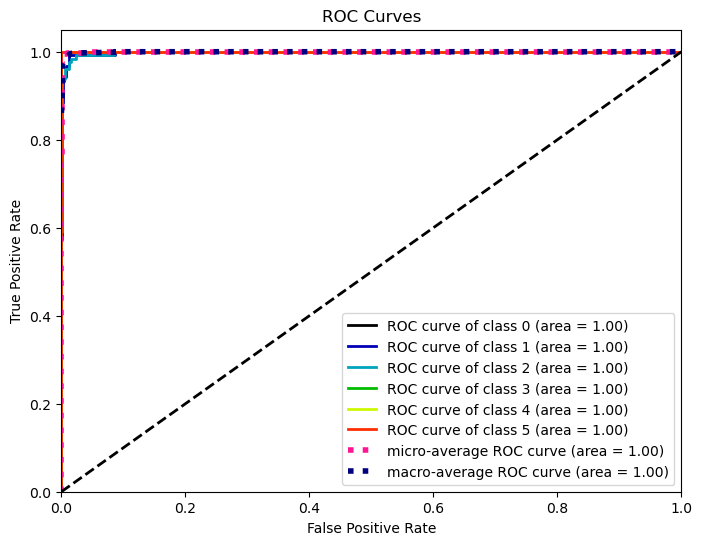

In [60]:
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

In [61]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train);

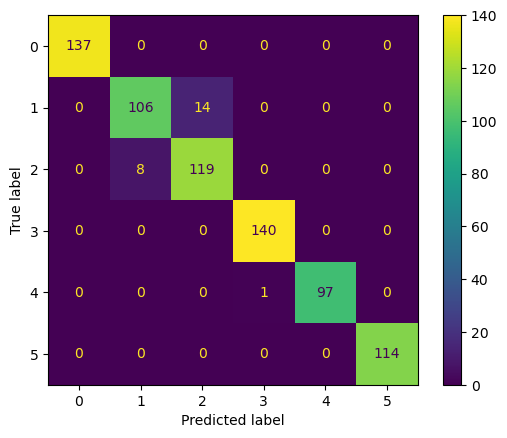

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_knn=confusion_matrix(y_test,y_test_pred_knn,labels=[0,1,2,3,4,5])
confusion_matrix_knn
cm_display_knn =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn)

cm_display_knn.plot()
plt.show()

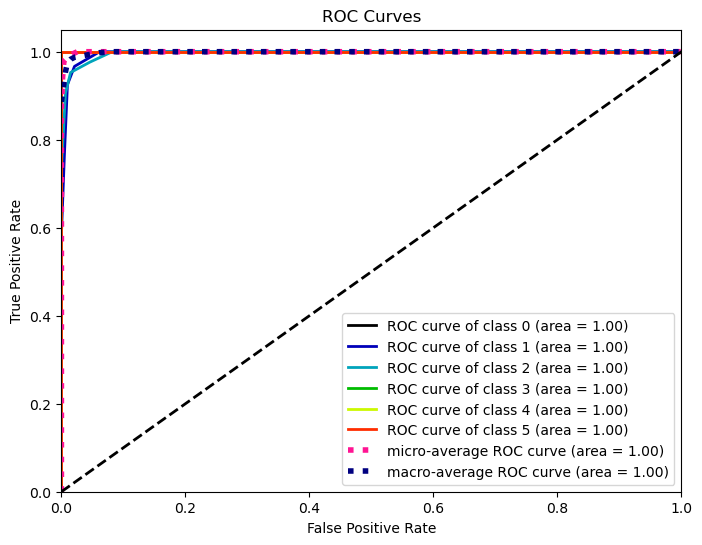

In [63]:
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

In [64]:
#Support Vector Classifier
from sklearn.svm import SVC
classifier=SVC(kernel='linear',probability = True)
classifier.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

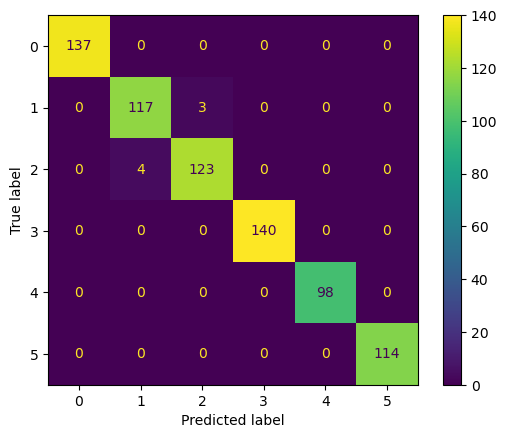

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_svc=confusion_matrix(y_test,y_test_pred_svc,labels=[0,1,2,3,4,5])
confusion_matrix_svc
cm_display_svc =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc)

cm_display_svc.plot()
plt.show()

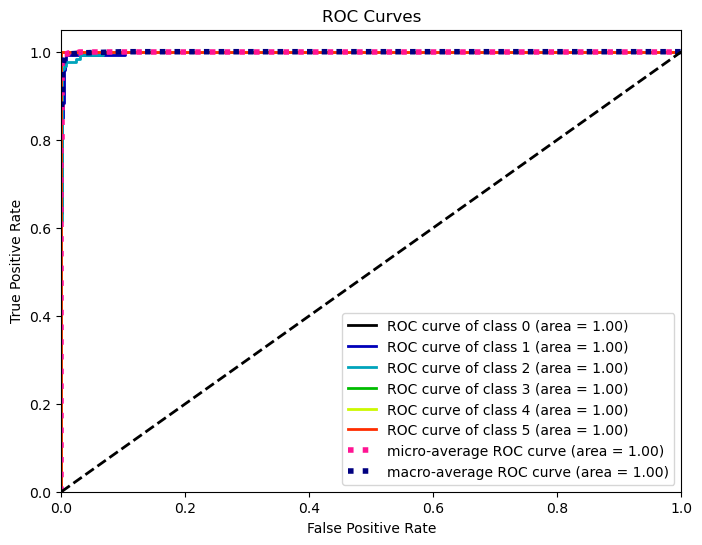

In [66]:
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

### Hard Voting Classifier: Ensemble Learning 

In [67]:
##Esemble Learning
final_model = VotingClassifier(
    estimators=[('rf', rf), ('dtc', tdt), ('lf', logisticRegr),('knn',knn),('SVC',sv)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final_vc = final_model.predict(x_test)
pred_final_train_vc=final_model.predict(x_train)

print(accuracy_score(y_train, pred_final_train_vc))
print(accuracy_score(y_test, pred_final_vc))
print(precision_score(y_test, pred_final_vc,average='micro'))
print(recall_score(y_test, pred_final_vc,average='micro'))
print(f1_score(y_test,pred_final_vc,average='micro'))
model_score_2 = model_score_2.append(pd.DataFrame({'index':[6],'Model':['Voting classifier hard'],'Recall':[recall_score(y_test, pred_final_vc,average='micro')],'Precision':[precision_score(y_test, pred_final_vc,average='micro')]}))
model_score_2

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

0.999093107617896
0.9918478260869565
0.9918478260869565
0.9918478260869565
0.9918478260869565


C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\91835634.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[6],'Model':['Voting classifier hard'],'Recall':[recall_score(y_test, pred_final_vc,average='micro')],'Precision':[precision_score(y_test, pred_final_vc,average='micro')]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696
0,4,KNN,0.968750,0.968750
0,5,SVM,0.990489,0.990489
0,6,Voting classifier hard,0.991848,0.991848


In [68]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[6],'Model':['Voting Classifier hard'],'Training Accuracy':[accuracy_score(y_train, pred_final_train_vc)],'Testing Accuracy':[accuracy_score(y_test, pred_final_vc)]}))
model_score_1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\4065490433.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[6],'Model':['Voting Classifier hard'],'Training Accuracy':[accuracy_score(y_train, pred_final_train_vc)],'Testing Accuracy':[accuracy_score(y_test, pred_final_vc)]}))


,index,Model,Training Accuracy,Testing Accuracy
0,1,Random Forest,1.000000,0.976902
0,2,Decision Tree,1.000000,0.951087
0,3,Logistic Regression,0.991838,0.983696
0,4,KNN,0.977932,0.968750
0,5,SVM,0.993501,0.990489
0,6,Voting Classifier hard,0.999093,0.991848


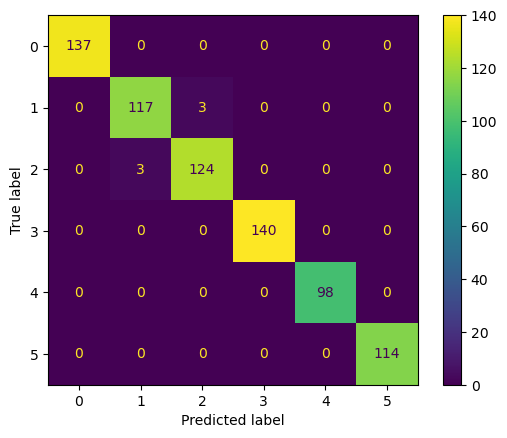

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_vch=confusion_matrix(y_test,pred_final_vc,labels=[0,1,2,3,4,5])
confusion_matrix_vch
cm_display_vch =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_vch)

cm_display_vch.plot()
plt.show()

### K-Fold where k=10

In [70]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [71]:
# Division of the data into 5 folds.  
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1

for train_index, test_index in kf.split(x_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 5292, Test set:1324
Fold:2, Train set: 5293, Test set:1323
Fold:3, Train set: 5293, Test set:1323
Fold:4, Train set: 5293, Test set:1323
Fold:5, Train set: 5293, Test set:1323


In [72]:
#K-fold on Random Forest model where k=5
scores_rf = cross_val_score(rf, x_train, y_train, cv=kf, scoring='f1_macro')
print("Avg accuracy: {}".format(scores_rf.mean()))

Avg accuracy: 0.9800353745021188


In [73]:
#Scores/ Metrics for each fold through Random Forest
for i in scores_rf:
    print(i)

0.9826893946050453
0.976296571900081
0.9853025386668155
0.9807424891009372
0.9751458782377145


In [74]:
#K-fold on Decision Tree model
scores_tdt = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=kf, scoring='f1_macro')
print("Avg accuracy: {}".format(scores_tdt.mean()))

Avg accuracy: 0.9332995488714106


In [75]:
#Scores/metircs for each fold through Decision Tree
for i in scores_tdt:
    print(i)

0.9283875721181615
0.9324077953506968
0.9405089166297939
0.933812114922369
0.9313813453360319


In [76]:
#K-fold on Logistic Regression model
scores_lr = cross_val_score(logisticRegr, x_train, y_train, cv=kf, scoring='f1_macro')
print("Avg accuracy: {}".format(scores_lr.mean()))

Avg accuracy: 0.985814145103924


In [77]:
#Score/ metric for each fold through Logistic Regression
for i in scores_lr:
    print(i)

0.9868646275313152
0.9847526755095841
0.9912250384024578
0.9858553122474603
0.9803730718288026


In [78]:
#K-fold on KNN model
scores_knn = cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=kf, scoring='f1_macro')
print("Avg accuracy: {}".format(scores_knn.mean()))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Avg accuracy: 0.9695035359866706


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [79]:
#Metrics for each fold through KNN
for i in scores_knn:
    print(i)

0.9703391803716634
0.968391487634117
0.971984124245389
0.970087645743478
0.9667152419387052


In [80]:
#K-fold on SVC model
scores_svm = cross_val_score(SVC(), x_train, y_train, cv=kf, scoring='f1_macro')
print("Avg accuracy: {}".format(scores_svm.mean()))

Avg accuracy: 0.9475590717077702


In [81]:
#Scores/ metrics for each fold through SVC
for i in scores_svm:
    print(i)

0.9593561324942007
0.9359490347318635
0.9485415298656342
0.9515531447785386
0.9423955166686144


In [82]:
#K-fold on Voting Classifier model
scores_vc = cross_val_score(final_model, x_train, y_train, cv=kf, scoring='f1_macro')
print("Avg accuracy: {}".format(scores_vc.mean()))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Avg accuracy: 0.9898565329253067


In [83]:
#Metric for each fold for voting classifier model
for i in scores_vc:
    print(i)

0.9929526692128271
0.990914141691018
0.9955228333328613
0.9896402739404925
0.9802527464493346


### Soft Voting Classifier

In [84]:
##Esemble Learning
final_model_soft = VotingClassifier(
    estimators=[('rf', rf), ('dtc', tdt), ('lf', logisticRegr),('knn',knn),('SVC',sv)], voting='soft')
 
# training all the model on the train dataset
final_model_soft.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final_soft = final_model_soft.predict(x_test)
pred_final_train_soft = final_model_soft.predict(x_train)

print(accuracy_score(y_train, pred_final_train_soft))
print(accuracy_score(y_test, pred_final_soft))
print(precision_score(y_test, pred_final_soft,average='micro'))
print(recall_score(y_test, pred_final_soft,average='micro'))
print(f1_score(y_test,pred_final_soft,average='micro'))
model_score_2 = model_score_2.append(pd.DataFrame({'index':[7],'Model':['Voting classifier soft'],'Recall':[recall_score(y_test, pred_final_soft,average='micro')],'Precision':[precision_score(y_test, pred_final_soft,average='micro')]}))
model_score_2


0.999546553808948
0.9945652173913043
0.9945652173913043
0.9945652173913043
0.9945652173913043


C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\626497912.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[7],'Model':['Voting classifier soft'],'Recall':[recall_score(y_test, pred_final_soft,average='micro')],'Precision':[precision_score(y_test, pred_final_soft,average='micro')]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696
0,4,KNN,0.968750,0.968750
0,5,SVM,0.990489,0.990489
0,6,Voting classifier hard,0.991848,0.991848
0,7,Voting classifier soft,0.994565,0.994565


In [85]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[7],'Model':['Voting Classifier soft'],'Training Accuracy':[accuracy_score(y_train, pred_final_train_soft)],'Testing Accuracy':[accuracy_score(y_test, pred_final_soft)]}))
model_score_1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\3263607816.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[7],'Model':['Voting Classifier soft'],'Training Accuracy':[accuracy_score(y_train, pred_final_train_soft)],'Testing Accuracy':[accuracy_score(y_test, pred_final_soft)]}))


,index,Model,Training Accuracy,Testing Accuracy
0,1,Random Forest,1.000000,0.976902
0,2,Decision Tree,1.000000,0.951087
0,3,Logistic Regression,0.991838,0.983696
0,4,KNN,0.977932,0.968750
0,5,SVM,0.993501,0.990489
0,6,Voting Classifier hard,0.999093,0.991848
0,7,Voting Classifier soft,0.999547,0.994565


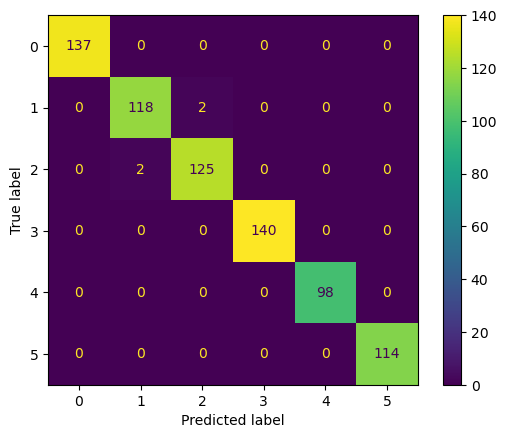

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_vcs=confusion_matrix(y_test,pred_final_soft,labels=[0,1,2,3,4,5])
confusion_matrix_vcs
cm_display_vcs =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_vcs)

cm_display_vcs.plot()
plt.show()

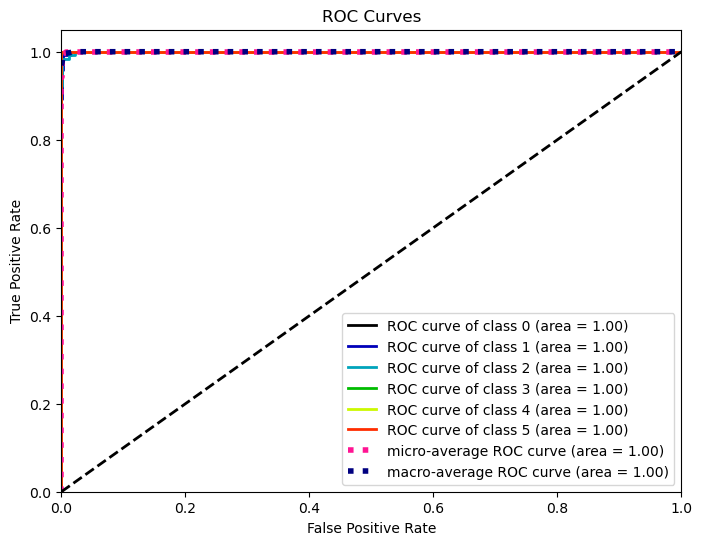

In [87]:
y_probas = final_model_soft.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

### Stacking


In [88]:
estimators = [
        ('knn', KNeighborsClassifier(5)),
        ('dtc', DecisionTreeClassifier()),
        ('sv', SVC(kernel="rbf")),
        ('lf',  LogisticRegression(max_iter=10000)),
]

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=RandomForestClassifier(n_estimators=1500, random_state = 42)
)

In [89]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

# predicting the output on the test dataset
pred_clf = clf.predict(x_test)
pred_clf_train =clf.predict(x_train)

print(accuracy_score(y_train, pred_clf_train))
print(accuracy_score(y_test, pred_clf))
print(precision_score(y_test, pred_clf,average='micro'))
print(recall_score(y_test, pred_clf,average='micro'))
print(f1_score(y_test,pred_clf,average='micro'))
model_score_1 = model_score_1.append(pd.DataFrame({'index':[8],'Model':['Stacking'],'Training Accuracy':[accuracy_score(y_train, pred_clf_train)],'Testing Accuracy':[accuracy_score(y_test, pred_clf)]}))
model_score_1
model_score_2 = model_score_2.append(pd.DataFrame({'index':[8],'Model':['Stacking'],'Recall':[recall_score(y_test, pred_clf,average='micro')],'Precision':[precision_score(y_test, pred_clf,average='micro')]}))
model_score_2

0.9984885126964933
0.9945652173913043
0.9945652173913043
0.9945652173913043
0.9945652173913043


C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\3208132669.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[8],'Model':['Stacking'],'Training Accuracy':[accuracy_score(y_train, pred_clf_train)],'Testing Accuracy':[accuracy_score(y_test, pred_clf)]}))
C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\3208132669.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[8],'Model':['Stacking'],'Recall':[recall_score(y_test, pred_clf,average='micro')],'Precision':[precision_score(y_test, pred_clf,average='micro')]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696
0,4,KNN,0.968750,0.968750
0,5,SVM,0.990489,0.990489
0,6,Voting classifier hard,0.991848,0.991848
0,7,Voting classifier soft,0.994565,0.994565
0,8,Stacking,0.994565,0.994565


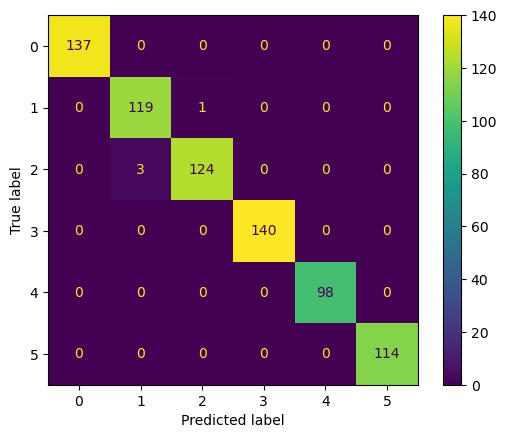

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_clf=confusion_matrix(y_test,pred_clf,labels=[0,1,2,3,4,5])
confusion_matrix_clf
cm_display_clf =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_clf)

cm_display_clf.plot()
plt.show()

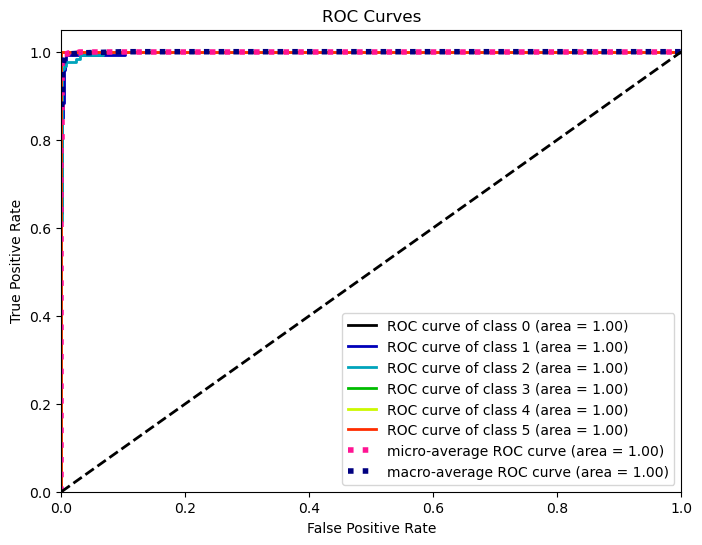

In [91]:
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

### Adaboost

In [92]:
ada = DecisionTreeClassifier()
model_ada = AdaBoostClassifier(
    n_estimators=50, base_estimator=ada,learning_rate=1
)

In [93]:
model_ada.fit(x_train,y_train)
y_pred = model_ada.predict(x_test)

# predicting the output on the test dataset
pred_ada = model_ada.predict(x_test)
pred_ada_train = model_ada.predict(x_train)

print(accuracy_score(y_train, pred_ada_train))
print(accuracy_score(y_test, pred_ada))
print(precision_score(y_test, pred_ada,average='micro'))
print(recall_score(y_test, pred_ada,average='micro'))
print(f1_score(y_test,pred_ada,average='micro'))
model_score_1 = model_score_1.append(pd.DataFrame({'index':[9],'Model':['Adaboost'],'Training Accuracy':[accuracy_score(y_train, pred_ada_train)],'Testing Accuracy':[accuracy_score(y_test, pred_ada)]}))
model_score_1
model_score_2 = model_score_2.append(pd.DataFrame({'index':[9],'Model':['Adaboost'],'Recall':[recall_score(y_test, pred_ada,average='micro')],'Precision':[precision_score(y_test, pred_ada,average='micro')]}))
model_score_2

1.0
0.9510869565217391
0.9510869565217391
0.9510869565217391
0.9510869565217391


C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\2814921.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[9],'Model':['Adaboost'],'Training Accuracy':[accuracy_score(y_train, pred_ada_train)],'Testing Accuracy':[accuracy_score(y_test, pred_ada)]}))
C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\2814921.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[9],'Model':['Adaboost'],'Recall':[recall_score(y_test, pred_ada,average='micro')],'Precision':[precision_score(y_test, pred_ada,average='micro')]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696
0,4,KNN,0.968750,0.968750
0,5,SVM,0.990489,0.990489
0,6,Voting classifier hard,0.991848,0.991848
0,7,Voting classifier soft,0.994565,0.994565
0,8,Stacking,0.994565,0.994565
0,9,Adaboost,0.951087,0.951087


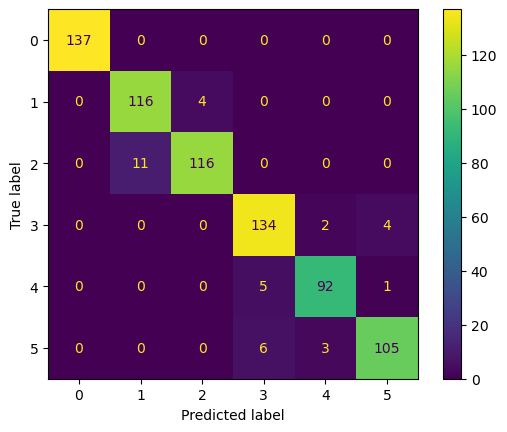

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_ada=confusion_matrix(y_test,pred_ada,labels=[0,1,2,3,4,5])
confusion_matrix_ada
cm_display_ada =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_ada)

cm_display_ada.plot()
plt.show()

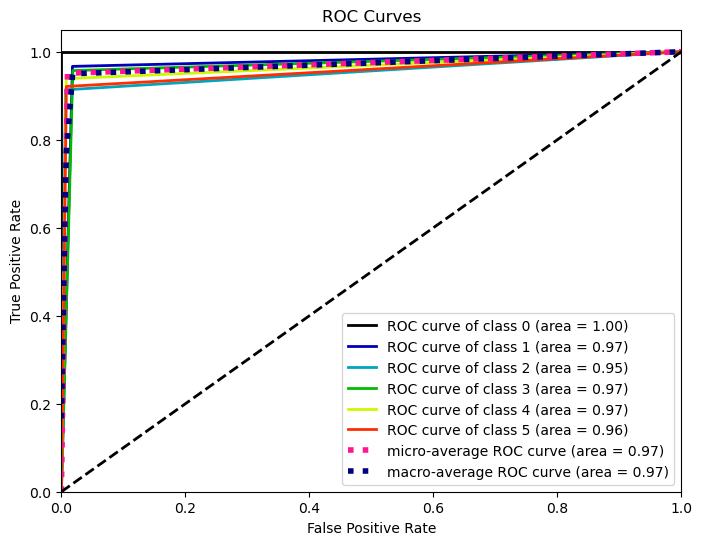

In [95]:
y_probas = model_ada.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

Combining Ensemble Algorithms

In [97]:
estimators = [
        ('dtc', AdaBoostClassifier(n_estimators=50, estimator=tdt,learning_rate=1)),
        ('vc', VotingClassifier(estimators=[('rf', rf), ('dtc', tdt),('knn',knn),('SVC',sv)], voting='soft'))       
]

clfa = StackingClassifier(
    estimators=estimators, 
    final_estimator=RandomForestClassifier(n_estimators=1500, random_state = 42)
)

TypeError: __init__() got an unexpected keyword argument 'estimator'

In [98]:
clfa.fit(x_train,y_train)
y_pred = clfa.predict(x_test)

# predicting the output on the test dataset
pred_clf = clfa.predict(x_test)
pred_clf_train =clfa.predict(x_train)

print(accuracy_score(y_train, pred_clf_train))
print(accuracy_score(y_test, pred_clf))
print(precision_score(y_test, pred_clf,average='micro'))
print(recall_score(y_test, pred_clf,average='micro'))
print(f1_score(y_test,pred_clf,average='micro'))



NameError: name 'clfa' is not defined

In [99]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[10],'Model':['Combined model 1'],'Training Accuracy':[accuracy_score(y_train, pred_clf_train)],'Testing Accuracy':[accuracy_score(y_test, pred_clf)]}))
model_score_1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\280792583.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[10],'Model':['Combined model 1'],'Training Accuracy':[accuracy_score(y_train, pred_clf_train)],'Testing Accuracy':[accuracy_score(y_test, pred_clf)]}))


,index,Model,Training Accuracy,Testing Accuracy
0,1,Random Forest,1.000000,0.976902
0,2,Decision Tree,1.000000,0.951087
0,3,Logistic Regression,0.991838,0.983696
0,4,KNN,0.977932,0.968750
0,5,SVM,0.993501,0.990489
0,6,Voting Classifier hard,0.999093,0.991848
0,7,Voting Classifier soft,0.999547,0.994565
0,8,Stacking,0.998489,0.994565
0,9,Adaboost,1.000000,0.951087
0,10,Combined model 1,0.998489,0.994565


In [100]:
model_score_2 = model_score_2.append(pd.DataFrame({'index':[10],'Model':['Combined model 1'],'Recall':[recall_score(y_test, pred_clf,average='micro')],'Precision':[precision_score(y_test, pred_clf,average='micro')]}))
model_score_2

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\908825292.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[10],'Model':['Combined model 1'],'Recall':[recall_score(y_test, pred_clf,average='micro')],'Precision':[precision_score(y_test, pred_clf,average='micro')]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696
0,4,KNN,0.968750,0.968750
0,5,SVM,0.990489,0.990489
0,6,Voting classifier hard,0.991848,0.991848
0,7,Voting classifier soft,0.994565,0.994565
0,8,Stacking,0.994565,0.994565
0,9,Adaboost,0.951087,0.951087
0,10,Combined model 1,0.994565,0.994565


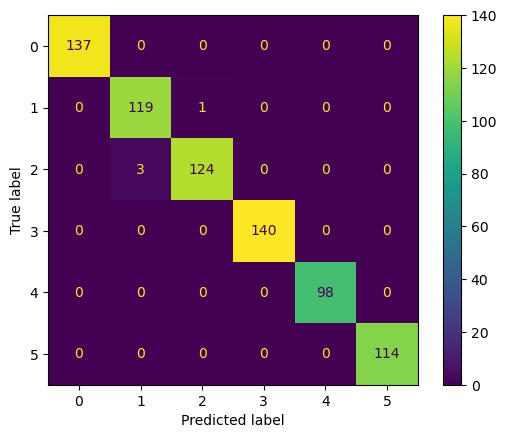

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_clf=confusion_matrix(y_test,pred_clf,labels=[0,1,2,3,4,5])
confusion_matrix_clf
cm_display_clf =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_clf)

cm_display_clf.plot()
plt.show()

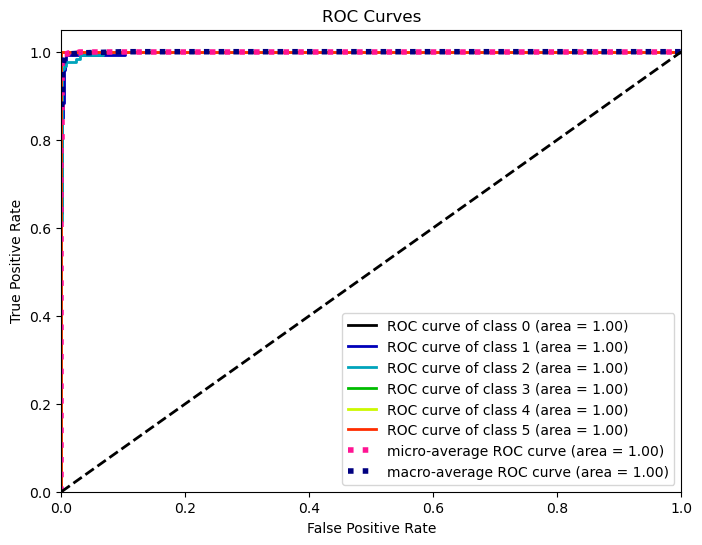

In [102]:
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

In [103]:
##Esemble Learning
el_soft = VotingClassifier(
    estimators=[('rf', rf), ('ada', model_ada),('clf',clf), ('clfa', clfa)], voting='soft')
 
# training all the model on the train dataset
el_soft.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final_soft = el_soft.predict(x_test)
pred_final_train_soft = el_soft.predict(x_train)

print(accuracy_score(y_train, pred_final_train_soft))
print(accuracy_score(y_test, pred_final_soft))
print(precision_score(y_test, pred_final_soft,average='micro'))
print(recall_score(y_test, pred_final_soft,average='micro'))
print(f1_score(y_test,pred_final_soft,average='micro'))

NameError: name 'clfa' is not defined

In [104]:
model_score_1 = model_score_1.append(pd.DataFrame({'index':[11],'Model':['Combined model 2'],'Training Accuracy':[accuracy_score(y_train, pred_final_train_soft)],'Testing Accuracy':[accuracy_score(y_test, pred_final_soft)]}))
model_score_1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\645144976.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_1 = model_score_1.append(pd.DataFrame({'index':[11],'Model':['Combined model 2'],'Training Accuracy':[accuracy_score(y_train, pred_final_train_soft)],'Testing Accuracy':[accuracy_score(y_test, pred_final_soft)]}))


,index,Model,Training Accuracy,Testing Accuracy
0,1,Random Forest,1.000000,0.976902
0,2,Decision Tree,1.000000,0.951087
0,3,Logistic Regression,0.991838,0.983696
0,4,KNN,0.977932,0.968750
0,5,SVM,0.993501,0.990489
0,6,Voting Classifier hard,0.999093,0.991848
0,7,Voting Classifier soft,0.999547,0.994565
0,8,Stacking,0.998489,0.994565
0,9,Adaboost,1.000000,0.951087
0,10,Combined model 1,0.998489,0.994565


In [105]:
model_score_2 = model_score_2.append(pd.DataFrame({'index':[11],'Model':['Combined model 2'],'Recall':[recall_score(y_test, pred_final_soft,average='micro')],'Precision':[precision_score(y_test, pred_final_soft,average='micro')]}))
model_score_2

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23456\2274380760.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_score_2 = model_score_2.append(pd.DataFrame({'index':[11],'Model':['Combined model 2'],'Recall':[recall_score(y_test, pred_final_soft,average='micro')],'Precision':[precision_score(y_test, pred_final_soft,average='micro')]}))


,index,Model,Recall,Precision
0,1,Random Forest,0.976902,0.976902
0,2,Decision tree,0.951087,0.951087
0,3,Logistic Regression,0.983696,0.983696
0,4,KNN,0.968750,0.968750
0,5,SVM,0.990489,0.990489
0,6,Voting classifier hard,0.991848,0.991848
0,7,Voting classifier soft,0.994565,0.994565
0,8,Stacking,0.994565,0.994565
0,9,Adaboost,0.951087,0.951087
0,10,Combined model 1,0.994565,0.994565


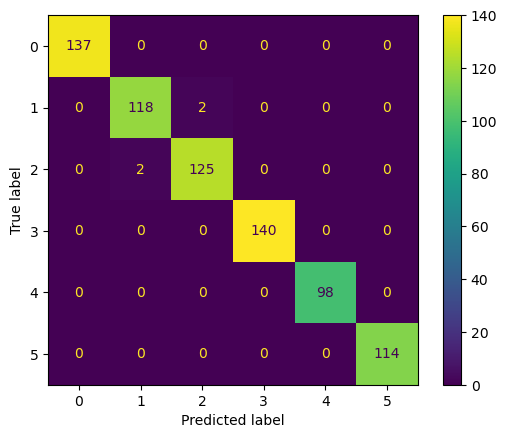

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix_vcs=confusion_matrix(y_test,pred_final_soft,labels=[0,1,2,3,4,5])
confusion_matrix_vcs
cm_display_vcs =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_vcs)

cm_display_vcs.plot()
plt.show()

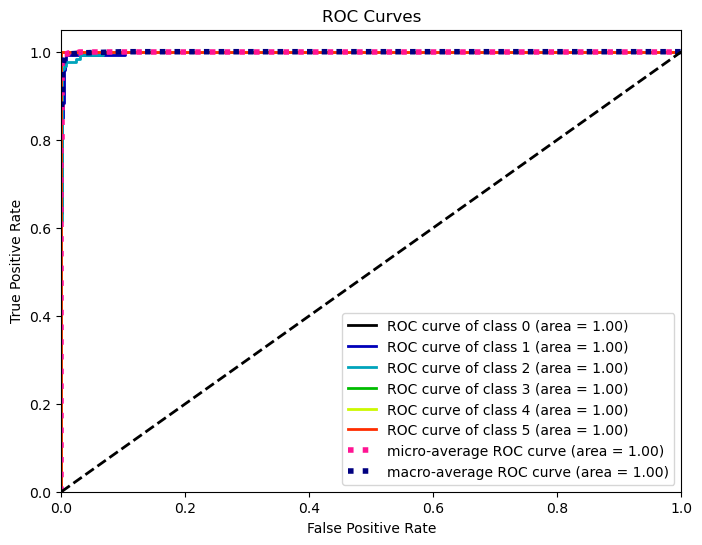

In [107]:
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6))   # Plot ROC Curve
plt.show()

In [108]:
import numpy as np

y_test_discrete = np.where(y_test >= 0.5, 1, 0)
y_pred_discrete = np.where(y_pred >= 0.5, 1, 0)

auc = round(metrics.roc_auc_score(y_test_discrete, y_pred_discrete, average='macro', multi_class='ovo'), 4)


In [109]:
import numpy as np

y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

In [110]:
bins = [0, 0.3, 0.7, 1]
y_test_bins = np.digitize(y_test, bins) - 1

In [111]:
y_pred_bins = np.digitize(y_pred, bins) - 1
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='macro', multi_class='ovo'), 4)


ROC for Algos

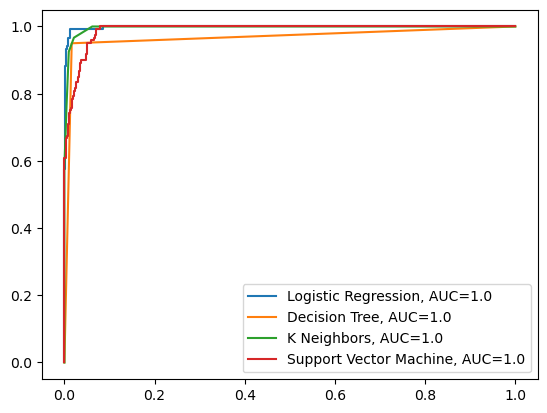

In [112]:
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="K Neighbors, AUC="+str(auc))

model = SVC(kernel="rbf",probability=True)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))


#add legend
plt.legend()

ROC for Ensemble

In [113]:
from sklearn.calibration import CalibratedClassifierCV

In [114]:
from sklearn.calibration import CalibratedClassifierCV

# Define individual classifiers
rf = RandomForestClassifier(n_estimators=100)
dtc = DecisionTreeClassifier()
sv = SVC(probability=True)
lf = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier(n_neighbors=10)

rf.fit(x_train, y_train)
dtc.fit(x_train, y_train)
sv.fit(x_train, y_train)
lf.fit(x_train, y_train)
knn.fit(x_train, y_train)

# Define voting classifiers
voting_clf_hard = VotingClassifier(estimators=[('rf', rf), ('dtc', dtc), ('lf', lf), ('knn', knn), ('SVC', sv)], voting='hard')
voting_clf_soft = VotingClassifier(estimators=[('rf', rf), ('dtc', dtc), ('lf', lf), ('knn', knn), ('SVC', sv)], voting='soft')

# Create calibrated classifier instances for each estimator
calibrated_rf = CalibratedClassifierCV(rf, cv='prefit')
calibrated_dtc = CalibratedClassifierCV(dtc, cv='prefit')
calibrated_sv = CalibratedClassifierCV(sv, cv='prefit')
calibrated_lf = CalibratedClassifierCV(lf, cv='prefit')
calibrated_knn = CalibratedClassifierCV(knn, cv='prefit')

# Load data and split into training and test sets
x_train, x_test, y_train, y_test =train_test_split(d1[xcol],d1[ycol].values,test_size =0.1)

# Fit the individual classifiers
calibrated_rf.fit(x_train, y_train)
calibrated_dtc.fit(x_train, y_train)
calibrated_sv.fit(x_train, y_train)
calibrated_lf.fit(x_train, y_train)
calibrated_knn.fit(x_train, y_train)

# Predict probabilities using calibrated classifiers
rf_probs = calibrated_rf.predict_proba(x_test)[:, 1]
dtc_probs = calibrated_dtc.predict_proba(x_test)[:, 1]
sv_probs = calibrated_sv.predict_proba(x_test)[:, 1]
lf_probs = calibrated_lf.predict_proba(x_test)[:, 1]
knn_probs = calibrated_knn.predict_proba(x_test)[:, 1]



In [115]:
voting_clf_soft = VotingClassifier(estimators=[('rf', rf), ('dtc', dtc), ('lf', lf), ('knn', knn), ('SVC', sv)], voting='soft')
voting_clf_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('lf', LogisticRegression(max_iter=10000)),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('SVC', SVC(probability=True))],
                 voting='soft')

In [116]:
voting_clf_hard = VotingClassifier(estimators=[('rf', rf), ('dtc', tdt), ('lf', logisticRegr), ('knn', knn), ('SVC', sv)], voting='hard')
voting_clf_hard.fit(x_train, y_train)
y_scores = voting_clf_hard.predict(x_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

y_pred = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Stacking(knn,dtc,sv,lf), AUC="+str(auc))

y_pred = model_ada.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Adaboost, AUC="+str(auc))

y_pred = voting_clf_soft.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Voting Classifier(Soft), AUC="+str(auc))

y_pred = clfa.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Stacking(adaboost,voting soft), AUC="+str(auc))

y_pred = el_soft.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred,pos_label=1)
auc = round(metrics.roc_auc_score(y_test_bins, y_pred_bins, average='micro', multi_class='ovr'), 4)
plt.plot(fpr,tpr,label="Voting Classifier(Soft) [rf,ada,clf,clfa], AUC="+str(auc))

#add legend
plt.legend()